In [ ]:
import json
import instructor
from typing import List
from collections import deque
from graphviz import Digraph, Source

from openai import OpenAI
from dotenv import load_dotenv
from pydantic import BaseModel, Field
from IPython.display import display

In [ ]:
load_dotenv(override=True)

client = instructor.from_openai(OpenAI())

In [ ]:
class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"

class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(..., default_factory=list)
    edges: List[Edge] = Field(..., default_factory=list)

In [4]:
def generate_kst_graph(input) -> KnowledgeGraph:
    return client.chat.completions.create(
        model="gpt-4o",
        temperature = 0.1,
        messages=[{"role": "user", "content": f"""You are an expert in Learning Expirience Design and Knowledge Space Theory. 
                                                  Present a detailed knowledge graph of the following concept: {input}.
                                                  
                                                  The knowledge graph should only use the 'prerequisite' connection type to define relationships between concepts.

                                                  - **Prerequisite Definition**: A prerequisite relation exists between two concepts when one must be understood or acquired before the other.
                                                  - **Example**: In mathematics, understanding addition is a prerequisite to understanding multiplication.
                                                  
                                                  Focus on capturing the learning dependencies between concepts to reflect a logical progression.
                                                  Include 'Competency Level C_:' and titles if they are present.
                                               """}],
                                                  response_model = KnowledgeGraph)

In [5]:
def generate_knowledge_graph(input) -> KnowledgeGraph:
    return client.chat.completions.create(
        model="gpt-4o",
        temperature = 0.1,
        messages=[{"role": "user", "content": f"""You are an expert in Data Science and Machine Learning. 
                                                  Present a detailed knowledge graph of the following machine learning concept: {input}. 

                                                  The graph should contain:

                                                    - Key concepts as nodes with detailed descriptions.
                                                    - Nodes should be connected using three specific types of edges: 'instance of', 'part of', 'has property'.
                                                    - Include any core properties or operations as child nodes where appropriate.

                                                  Make sure the graph is organized logically with all connections clearly defined, from basic to advanced topics.
                                                  Include 'Competency Level C_:' and titles if they are present."""}],
                                                  response_model=KnowledgeGraph)

In [6]:
def visualize_knowledge_graph(kg, node_shape='box', node_style='rounded', edge_style='dashed', fontname='Avenir Next', fontsize='14', fontcolor='grey', edge_width='0.5', edge_color='gray', edge_fontsize='10'):
    dot = Digraph(comment="Knowledge Graph")

    for node in kg.nodes:
        dot.node(str(node.id), node.label, shape=node_shape, style=node_style, color='black', fontname=fontname, fontsize=fontsize, fontcolor=fontcolor)
    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, style=edge_style, color=edge_color, fontname=fontname, fontsize=edge_fontsize, fontcolor=fontcolor, penwidth=edge_width)
        
    display(Source(dot.source))

In [7]:
competency = r"""

### **High-Level Overview of Dependencies and Knowledge States**

---

#### **Foundational Knowledge (C1)**

- **Core Areas**: Basic Statistics and Linear Algebra
- **Purpose**: This is the starting point for any learning in supervised learning. Concepts such as probability, distributions, vectors, matrices, and operations form the building blocks for more complex topics.
  
**Dependencies**:  
- **Prerequisite for All Levels**: All other competencies build upon this foundation, as statistical and algebraic understanding is essential for grasping data preparation, model algorithms, and evaluation.

---

#### **Data Preparation (C2)**

- **Core Areas**: Data cleaning, feature selection, data transformation, dimensionality reduction
- **Purpose**: Before training a model, data needs to be properly prepared. This stage focuses on making raw data suitable for machine learning models through cleaning, normalization, encoding, and selecting the most relevant features.

**Dependencies**:  
- **Depends on C1**: Foundational statistics and linear algebra are necessary for effective data transformation, scaling, and feature selection.
- **Feeds into C3 and C4**: Properly prepared data ensures models (C3) are built on quality inputs and optimized (C4) effectively during training.

---

#### **Core Algorithms (C3)**

- **Core Areas**: Regression, classification, linear models, decision trees, ensemble methods
- **Purpose**: This is the central knowledge state where learners delve into the algorithms that make up supervised learning. Understanding the mechanisms behind these algorithms is crucial for effectively applying machine learning techniques.

**Dependencies**:  
- **Requires C1 and C2**: Understanding algorithms (such as linear regression, logistic regression, decision trees) relies heavily on mathematical knowledge (C1) and prepared data (C2). Without clean data and proper preprocessing, models cannot be applied effectively.
- **Feeds into C4**: Once learners understand the algorithms, they need to know how to train and optimize them (C4).

---

#### **Optimization and Model Training (C4)**

- **Core Areas**: Gradient descent (batch, stochastic, mini-batch), convergence criteria, stopping criteria
- **Purpose**: After understanding algorithms, the next step is learning how to train them efficiently. This stage focuses on optimization techniques that minimize error and ensure models converge to a solution.

**Dependencies**:  
- **Relies on C3**: Optimization can only be performed once the learner knows how the model works. Therefore, understanding core algorithms is essential before focusing on training and optimization.
- **Feeds into C6**: Understanding how to optimize models is critical when dealing with model complexity and preventing overfitting (C6).

---

#### **Model Evaluation (C5)**

- **Core Areas**: Evaluation metrics (MSE, RMSE, accuracy, precision, recall, F1-score), cross-validation, hyperparameter tuning
- **Purpose**: This competency ensures learners can assess the performance of their models effectively. Evaluation is crucial to understanding whether models are performing well on unseen data.

**Dependencies**:  
- **Depends on C1 and C3**: Metrics such as mean squared error or precision are rooted in basic statistics (C1), while evaluation focuses on measuring the performance of core algorithms (C3).
- **Feeds into C4 and C6**: Evaluation metrics help tune model performance (C4) and assess model complexity to prevent overfitting (C6).

---

#### **Model Complexity and Generalization (C6)**

- **Core Areas**: Overfitting, underfitting, regularization (L1, L2, ElasticNet), dropout (for neural networks)
- **Purpose**: Learners must be able to balance model complexity to ensure the model generalizes well to unseen data. This stage focuses on techniques that prevent overfitting and underfitting.

**Dependencies**:  
- **Depends on C4 and C5**: Balancing model complexity requires understanding how the model is trained (C4) and how it performs on validation data (C5).
- **Feeds into C7**: Mastering complexity control allows learners to explore more advanced techniques in machine learning.

---

#### **Advanced Topics (C7)**

- **Core Areas**: Feature engineering, dimensionality reduction (PCA, LDA), handling imbalanced datasets (SMOTE, class weighting)
- **Purpose**: At this level, learners explore advanced topics that improve model performance and deal with specific challenges like class imbalance or high-dimensional data.

**Dependencies**:  
- **Builds on C2, C3, and C5**: Advanced techniques like feature engineering (C2), and dimensionality reduction (C7) require a solid grasp of core algorithms (C3) and how models are evaluated (C5).
- **Feeds into C8**: Mastering these topics helps learners implement better models in real-world applications.

---

#### **Practical Implementation (C8)**

- **Core Areas**: Using libraries (Scikit-learn, TensorFlow, PyTorch), full supervised learning workflow (data preprocessing, model selection, training, evaluation)
- **Purpose**: This competency shifts the focus to practical implementation using modern tools. Learners practice building models from scratch, training, and deploying them in real-world scenarios.

**Dependencies**:  
- **Requires C1 to C7**: To successfully implement machine learning models, learners must have mastered foundational concepts (C1), data preparation (C2), algorithms (C3), and advanced techniques (C7).
- **Feeds into C9**: After building models, learners move on to applying them in real-world use cases.

---

#### **Applications in Industry (C9)**

- **Core Areas**: Real-world applications (regression for house prices, classification for spam detection, time series for stock forecasting)
- **Purpose**: The final competency involves applying learned concepts to solve real-world problems. Learners will connect all prior knowledge to industry-specific applications.

**Dependencies**:  
- **Requires Practical Knowledge from C8**: Successfully applying models to industry problems depends on the ability to implement them in practice, which requires a solid understanding of previous competencies.

---

### **Visualizing Dependencies (Graph Overview)**

- **Competency Level C1: Foundational Knowledge**  
   → Prerequisite for **C2** (Data Preparation) and **C3** (Core Algorithms).
  
- **Competency Level C2: Data Preparation**  
   → Feeds into **C3** (Core Algorithms), **C4** (Optimization and Training), and **C7** (Advanced Topics).

- **Competency Level C3: Core Algorithms**  
   → Relies on **C1** (Foundational Knowledge) and **C2** (Data Preparation).  
   → Feeds into **C4** (Optimization and Training), **C5** (Evaluation), and **C6** (Complexity).

- **Competency Level C4: Optimization and Model Training**  
   → Relies on **C3** (Core Algorithms).  
   → Feeds into **C6** (Complexity).

- **Competency Level C5: Model Evaluation and Validation**  
   → Depends on **C1** (Foundational Knowledge) and **C3** (Core Algorithms).  
   → Feeds into **C4** (Optimization and Training) and **C6** (Complexity).

- **Competency Level C6: Model Complexity and Generalization**  
   → Depends on **C4** (Optimization) and **C5** (Evaluation).  
   → Feeds into **C7** (Advanced Topics).

- **Competency Level C7: Advanced Topics**  
   → Builds on **C2** (Data Preparation), **C3** (Core Algorithms), and **C5** (Evaluation).

- **Competency Level C8: Practical Implementation**  
   → Requires mastery of **C1** to **C7**.

- **Competency Level C9: Applications in Industry**  
   → Relies on **C8** (Practical Implementation)."""

In [ ]:
graph = generate_kst_graph(competency)

schema_competencies = json.loads(graph.model_dump_json(indent=2))

for node in schema_competencies['nodes']:
    print(node['label'])

In [8]:
graph = generate_kst_graph(competency)

schema_competencies = json.loads(graph.model_dump_json(indent=2))

for node in schema_competencies['nodes']:
    print(node['label'])

Competency Level C1: Foundational Knowledge
Competency Level C2: Data Preparation
Competency Level C3: Core Algorithms
Competency Level C4: Optimization and Model Training
Competency Level C5: Model Evaluation and Validation
Competency Level C6: Model Complexity and Generalization
Competency Level C7: Advanced Topics
Competency Level C8: Practical Implementation
Competency Level C9: Applications in Industry


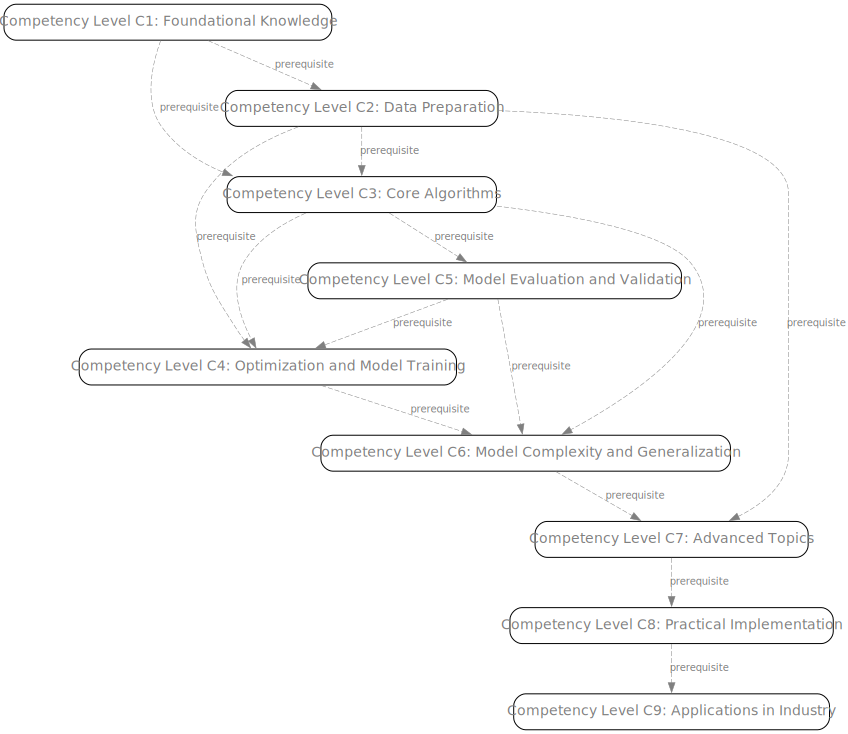

In [9]:
visualize_knowledge_graph(graph)

In [10]:
C1 = r"""

### **Competency Level C1: Foundational Knowledge**

This is the base level where learners build essential mathematical and statistical understanding. Mastery of these concepts is crucial for higher-level topics.

#### **C1.1. Basic Statistics**

- **Mean, Median, Mode**: Measures of central tendency.
- **Variance and Standard Deviation**: Measures of data spread and how much data deviates from the mean.
- **Probability Theory**: 
  - **Discrete vs. Continuous Probability Distributions** (e.g., Binomial, Poisson, Gaussian).
  - **Conditional Probability**: \( P(A|B) = \frac{P(A \cap B)}{P(B)} \).
  - **Bayes’ Theorem**: \( P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} \).
  - **Law of Large Numbers and Central Limit Theorem**: Concepts critical for understanding machine learning model behavior over large datasets.
- **Probability Distributions**:
  - **Normal Distribution** (Gaussian).
  - **Binomial Distribution**.
  - **Poisson Distribution**.
- **Covariance and Correlation**:
  - **Covariance**: \( \text{Cov}(X, Y) = \frac{\sum (X_i - \mu_X)(Y_i - \mu_Y)}{N} \).
  - **Correlation Coefficient (Pearson’s)**: \( \rho = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} \).

#### **C1.2. Linear Algebra**

- **Vectors**: Magnitude and direction, basic operations like addition, scalar multiplication.
- **Matrices**: 
  - **Matrix Operations**: Addition, multiplication, inverse, transpose.
  - **Determinants**: \( \text{det}(A) \), properties, and applications in solving systems of equations.
- **Eigenvalues and Eigenvectors**: Solving \( A \mathbf{v} = \lambda \mathbf{v} \), where \( \lambda \) is the eigenvalue, and \( \mathbf{v} \) is the eigenvector.
- **Singular Value Decomposition (SVD)**: \( A = U \Sigma V^T \), used for dimensionality reduction.
- **Vector Spaces and Orthogonality**: Understanding basis, subspace, orthogonal vectors.

#### **C1.3. Calculus**

- **Derivatives**: Fundamental for optimization in machine learning (e.g., finding the slope of a function).
- **Partial Derivatives**: Key for optimization in multivariate functions (e.g., gradient descent).
- **Integration**: Understanding areas under curves, useful for probabilistic models and other concepts.
"""

In [11]:
graph = generate_knowledge_graph(C1)

schema_C1 = json.loads(graph.model_dump_json(indent=2))
for node in schema_C1['nodes']:
    print(node['label'])

Competency Level C1: Foundational Knowledge
C1.1. Basic Statistics
C1.2. Linear Algebra
Mean, Median, Mode
Variance and Standard Deviation
Probability Theory
Probability Distributions
Covariance and Correlation
Vectors
Matrices
Eigenvalues and Eigenvectors
Singular Value Decomposition (SVD)
Vector Spaces and Orthogonality
Discrete vs. Continuous Probability Distributions
Conditional Probability
Bayes’ Theorem
Normal Distribution
Binomial Distribution
Poisson Distribution
Covariance
Correlation Coefficient (Pearson’s)
Matrix Operations
Determinants
Addition
Multiplication
Inverse
Transpose


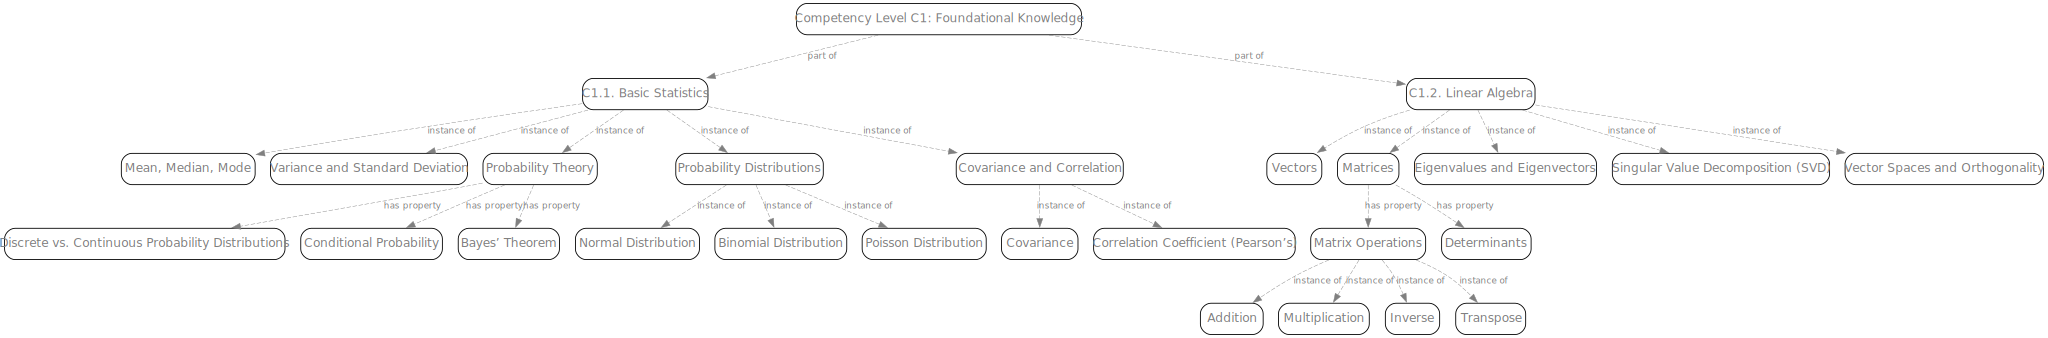

In [12]:
visualize_knowledge_graph(graph)

In [13]:
C2 = r"""
### **Competency Level C2: Data Preparation**

Data preparation involves cleaning, transforming, and preprocessing data so that machine learning algorithms can be applied effectively.

#### **C2.1. Data Cleaning**

- **Handling Missing Data**: Imputation methods (mean, median, mode, forward-fill, backward-fill).
- **Dealing with Outliers**: Detection (IQR method, Z-score) and treatment (capping, removing, transforming).
- **Data Integrity Checks**: Removing duplicates, ensuring consistent formats, etc.
- **Detecting Data Anomalies**: Identification of rare or unique patterns in data (important for time series and classification tasks).

#### **C2.2. Data Transformation**

- **Scaling Features**: 
  - **Normalization (Min-Max Scaling)**: Rescaling features to a [0,1] range.
  - **Standardization (Z-Score Normalization)**: \( z = \frac{x - \mu}{\sigma} \).
- **Encoding Categorical Variables**:
  - **One-Hot Encoding**: For non-ordinal categorical variables.
  - **Label Encoding**: For ordinal variables.
- **Text Vectorization Techniques**: 
  - **Bag of Words (BoW)**.
  - **TF-IDF (Term Frequency-Inverse Document Frequency)**.

#### **C2.3. Feature Engineering**

- **Feature Selection**:
  - **Variance Thresholding**: Removing features with low variance.
  - **Recursive Feature Elimination (RFE)**.
  - **Univariate Selection (Chi-Square Test, ANOVA)**.
- **Creating Interaction Terms**: Combining features to create new ones.
- **Polynomial Features**: Creating higher-degree versions of existing features to capture non-linear relationships.
- **Feature Construction from Domain Knowledge**: Incorporating domain knowledge into the feature set (e.g., creating new financial ratios for stock prediction).

#### **C2.4. Dimensionality Reduction**

- **Principal Component Analysis (PCA)**: Reducing dimensionality while preserving variance.
- **Linear Discriminant Analysis (LDA)**: Reducing dimensions for classification tasks while maximizing class separability.
- **t-SNE and UMAP**: Non-linear dimensionality reduction methods for visualization and clustering.
"""

In [14]:
graph = generate_knowledge_graph(C2)

schema_C2 = json.loads(graph.model_dump_json(indent=2))
for node in schema_C2['nodes']:
    print(node['label'])

Competency Level C2: Data Preparation
C2.1. Data Cleaning
C2.2. Data Transformation
C2.3. Feature Engineering
C2.4. Dimensionality Reduction
Handling Missing Data
Dealing with Outliers
Data Integrity Checks
Scaling Features
Encoding Categorical Variables
Feature Selection
Creating Interaction Terms
Polynomial Features
Principal Component Analysis (PCA)
Linear Discriminant Analysis (LDA)
Imputation methods
Detection and Treatment of Outliers
Normalization (Min-Max Scaling)
Standardization (Z-Score Normalization)
One-Hot Encoding
Label Encoding
Variance Thresholding
Recursive Feature Elimination (RFE)
Univariate Selection
Chi-Square Test
ANOVA


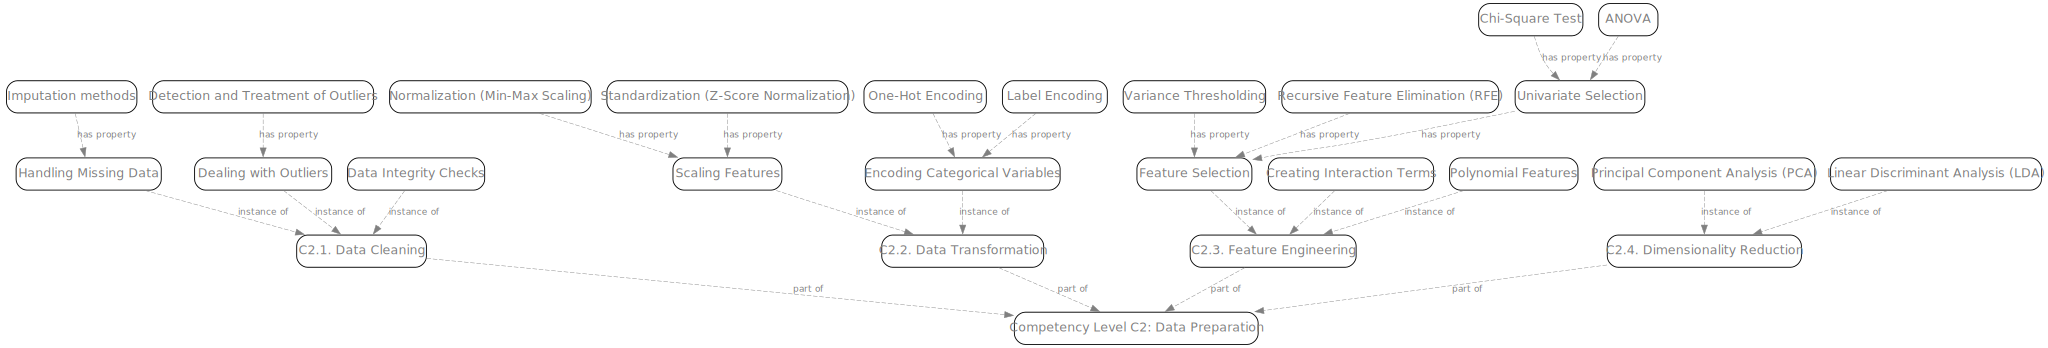

In [15]:
visualize_knowledge_graph(graph)

In [16]:
C3 = r"""
### **Competency Level C3: Core Algorithms**

This level focuses on understanding and applying core machine learning algorithms for both regression and classification tasks.

#### **C3.1. Linear Models**

- **Linear Regression**: 
  - Linear relationships between input and output.
  - **Equation**: \( y = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n \).
  - **Assumptions**: Linearity, independence, homoscedasticity, normality of residuals.
  - **Ordinary Least Squares (OLS)**: Minimizing residuals \( \sum (y_i - \hat{y_i})^2 \).
  - **Regularization Techniques**:
    - **Ridge Regression (L2)**.
    - **Lasso Regression (L1)**.
    - **ElasticNet**: A combination of L1 and L2 regularization.

- **Logistic Regression**:
  - **Sigmoid Function**: \( P(y=1|x) = \frac{1}{1+e^{-\beta_0 - \beta_1x}} \).
  - **Maximum Likelihood Estimation (MLE)**: Method for fitting the logistic regression model.

#### **C3.2. Decision Trees**

- **Entropy**: \( H(X) = -\sum P(x) \log_2 P(x) \), measure of impurity.
- **Gini Index**: \( 1 - \sum p_i^2 \), another measure of impurity.
- **Tree Pruning**: Reducing the size of decision trees to avoid overfitting.

#### **C3.3. Ensemble Methods**

- **Bagging**: Bootstrap Aggregating, e.g., Random Forests.
- **Boosting**: Sequential ensemble learning, e.g., AdaBoost, Gradient Boosting.
- **Stacking**: Combining different model types for better accuracy.
"""

In [17]:
graph = generate_knowledge_graph(C3)

schema_C3 = json.loads(graph.model_dump_json(indent=2))
for node in schema_C3['nodes']:
    print(node['label'])

Competency Level C3: Core Algorithms
C3.1. Linear Models
Linear Regression
Equation: y = β0 + β1x1 + ... + βnxn
Assumptions: Linearity, independence, homoscedasticity, normality of residuals
Ordinary Least Squares (OLS)
Regularization Techniques
Ridge Regression (L2)
Lasso Regression (L1)
ElasticNet
Logistic Regression
Sigmoid Function: P(y=1|x) = 1 / (1+e^(-β0 - β1x))
Maximum Likelihood Estimation (MLE)
C3.2. Decision Trees
Entropy: H(X) = -Σ P(x) log2 P(x)
Gini Index: 1 - Σ p_i^2
Tree Pruning
C3.3. Ensemble Methods
Bagging: Bootstrap Aggregating, e.g., Random Forests
Boosting: Sequential ensemble learning, e.g., AdaBoost, Gradient Boosting
Stacking: Combining different model types for better accuracy


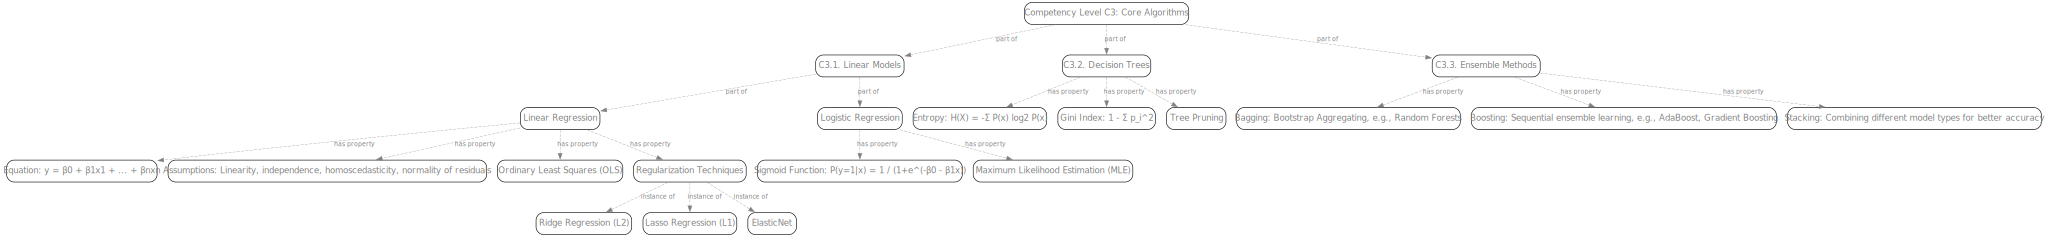

In [18]:
visualize_knowledge_graph(graph)

In [19]:
C4 = r"""
### **Competency Level C4: Optimization and Model Training**

At this level, learners focus on how models are trained and optimized for better performance.

#### **C4.1. Gradient Descent**

- **Batch Gradient Descent**: Updates parameters using all training data.
- **Stochastic Gradient Descent (SGD)**: Updates parameters one example at a time.
- **Mini-batch Gradient Descent**: Uses subsets (mini-batches) of the training data for updates.
- **Learning Rate**: Adjusting step size during optimization.
- **Convergence Criteria**: When to stop gradient descent (e.g., when the cost function doesn't change significantly).
- **Momentum, RMSProp, and Adam Optimizers**: Advanced techniques for improving gradient descent.

#### **C4.2. Regularization Techniques**

- **L1 (Lasso)**: Adds absolute values of coefficients to the loss function.
- **L2 (Ridge)**: Adds the square of the coefficients to the loss function.
- **ElasticNet**: Combines L1 and L2 for improved generalization.
- **Dropout** (for neural networks): Randomly dropping units during training to prevent overfitting.
"""

In [20]:
graph = generate_knowledge_graph(C4)

schema_C4 = json.loads(graph.model_dump_json(indent=2))
for node in schema_C4['nodes']:
    print(node['label'])

Competency Level C4: Optimization and Model Training
C4.1. Gradient Descent
Batch Gradient Descent
Stochastic Gradient Descent (SGD)
Mini-batch Gradient Descent
Learning Rate
Convergence Criteria
C4.2. Regularization Techniques
L1 (Lasso)
L2 (Ridge)
ElasticNet


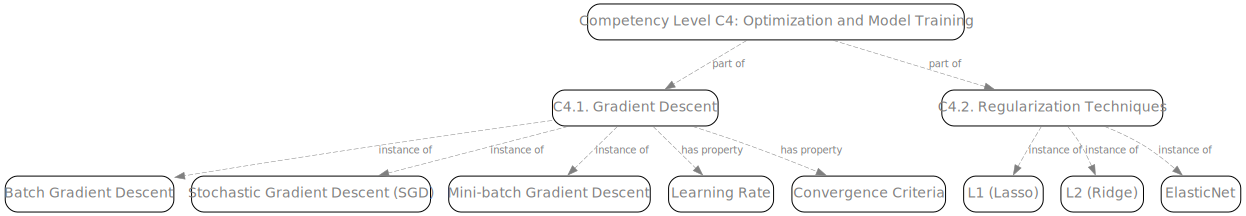

In [21]:
visualize_knowledge_graph(graph)

In [22]:
C5 = r"""
### **Competency Level C5: Model Evaluation and Validation**

Evaluation and validation are key for assessing model performance and making decisions on how to improve models.

#### **C5.1. Model Evaluation Metrics**

- **For Regression**:
  - **Mean Squared Error (MSE)**.
  - **Root Mean Squared Error (RMSE)**.
  - **Mean Absolute Error (MAE)**.
  - **\( R^2 \)** (Coefficient of Determination).

- **For Classification**:
  - **Accuracy**.
  - **Precision**, **Recall**, **F1-Score**.
  - **Confusion Matrix**: True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN).
  - **ROC Curve** and **AUC**.

#### **C5.2. Cross-Validation**

- **Holdout Validation**: Splitting the dataset into training and testing sets.
- **K-Fold Cross-Validation**: Dividing the data into K subsets, training on K-1 and testing on the remaining.
- **Leave-One-Out Cross-Validation (LOOCV)**: Special case of K-fold where K equals the number of samples.

#### **C5.3. Hyperparameter Tuning**

- **Grid Search**: Trying all combinations of hyperparameters.
- **Random Search**: Sampling random hyperparameters.
- **Bayesian Optimization**: Efficient search over the hyperparameter space using probabilistic models.
"""

In [23]:
graph = generate_knowledge_graph(C5)

schema_C5 = json.loads(graph.model_dump_json(indent=2))
for node in schema_C5['nodes']:
    print(node['label'])

Competency Level C5: Model Evaluation and Validation
C5.1. Model Evaluation Metrics
C5.2. Cross-Validation
C5.3. Hyperparameter Tuning
Regression Metrics
Classification Metrics
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Mean Absolute Error (MAE)
R^2 (Coefficient of Determination)
Accuracy
Precision
Recall
F1-Score
Confusion Matrix
ROC Curve
AUC
Holdout Validation
K-Fold Cross-Validation
Leave-One-Out Cross-Validation (LOOCV)
Grid Search
Random Search
Bayesian Optimization
True Positives (TP)
False Positives (FP)
False Negatives (FN)
True Negatives (TN)


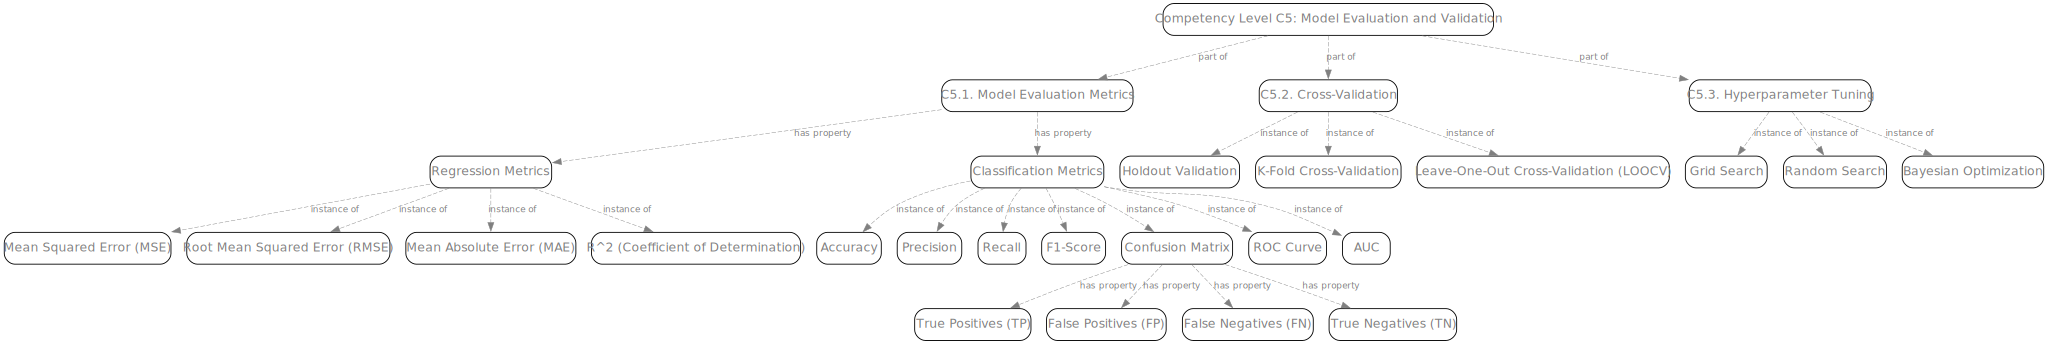

In [24]:
visualize_knowledge_graph(graph)

In [25]:
C6 = r""" 
### **Competency Level C6: Model Complexity and Generalization**

Controlling model complexity ensures that models generalize well to unseen data.

#### **C6.1. Overfitting and Underfitting**

- **Overfitting**: Model performs well on training data but poorly on unseen data (high variance).
- **Underfitting**: Model is too simple and cannot capture the underlying pattern in data (high bias).

#### **C6.2. Regularization Techniques**

- **L1 and L2 Regularization** (discussed earlier under C4.2).
- **Dropout** (for neural networks): Randomly dropping units during training to prevent overfitting.

#### **C6.3. Cross-Validation to Avoid Overfitting**

- **Cross-validation** ensures models generalize well to unseen data by validating performance on different subsets.
"""

In [26]:
graph = generate_knowledge_graph(C6)

schema_C6 = json.loads(graph.model_dump_json(indent=2))
for node in schema_C6['nodes']:
    print(node['label'])

Competency Level C6: Model Complexity and Generalization
C6.1. Overfitting and Underfitting
Overfitting
Underfitting
C6.2. Regularization Techniques
L1 and L2 Regularization
Dropout
C6.3. Cross-Validation to Avoid Overfitting
Cross-validation


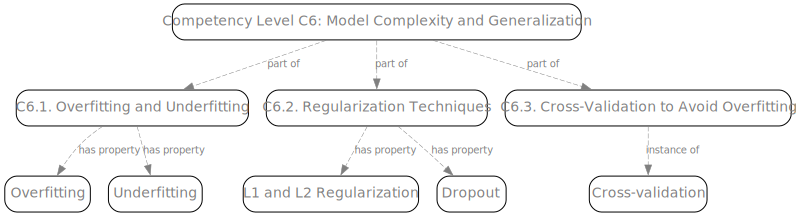

In [27]:
visualize_knowledge_graph(graph)

In [28]:
C7 = r"""
### **Competency Level C7: Advanced Topics**

Advanced techniques help enhance model performance and handle specific challenges in real-world data.

#### **C7.1. Feature Engineering and Dimensionality Reduction**

- **Recursive Feature Elimination (RFE)**: Iteratively removing less important features.
- **PCA and LDA**

 (discussed earlier under C2.4).

#### **C7.2. Handling Imbalanced Datasets**

- **SMOTE**: Synthetic Minority Over-sampling Technique.
- **Class Weighting**: Adjusting the model to account for class imbalance.
"""

In [29]:
graph = generate_knowledge_graph(C7)

schema_C7 = json.loads(graph.model_dump_json(indent=2))
for node in schema_C7['nodes']:
    print(node['label'])

Competency Level C7: Advanced Topics
C7.1. Feature Engineering and Dimensionality Reduction
C7.2. Handling Imbalanced Datasets
Recursive Feature Elimination (RFE)
PCA and LDA
SMOTE
Class Weighting


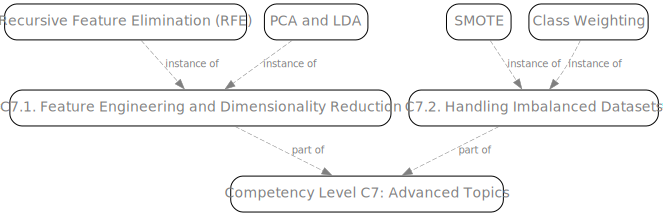

In [30]:
visualize_knowledge_graph(graph)

In [31]:
C8 = r"""
### **Competency Level C8: Practical Implementation**

Here, learners focus on applying all previously learned concepts in practice, using various libraries and tools.

#### **C8.1. Tools and Frameworks**

- **Scikit-learn**: Popular Python library for machine learning.
- **TensorFlow and PyTorch**: Libraries for deep learning and more advanced machine learning models.

#### **C8.2. Workflow for Supervised Learning**

- **Problem Definition**, **Data Collection**, **Data Preparation**, **Model Selection**, **Training**, **Evaluation**, **Optimization**, and **Deployment**.
"""

In [32]:
graph = generate_knowledge_graph(C8)

schema_C8 = json.loads(graph.model_dump_json(indent=2))
for node in schema_C8['nodes']:
    print(node['label'])

Competency Level C8: Practical Implementation
C8.1. Tools and Frameworks
Scikit-learn
TensorFlow
PyTorch
C8.2. Workflow for Supervised Learning
Problem Definition
Data Collection
Data Preparation
Model Selection
Training
Evaluation
Optimization
Deployment


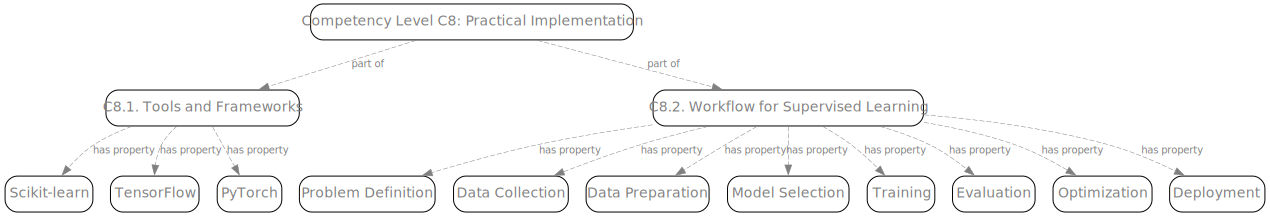

In [33]:
visualize_knowledge_graph(graph)

In [34]:
C9 = r""" 
### **Competency Level C9: Applications in Industry**

At the final level, learners apply their knowledge to real-world industry problems.

#### **C9.1. Real-World Applications**

- **Regression**: Predicting house prices, stock prices, energy consumption.
- **Classification**: Spam detection, sentiment analysis, medical diagnosis.
- **Time Series Forecasting**: Sales predictions, weather forecasting."""

In [35]:
graph = generate_knowledge_graph(C9)

schema_C9 = json.loads(graph.model_dump_json(indent=2))
for node in schema_C9['nodes']:
    print(node['label'])

Competency Level C9: Applications in Industry
C9.1. Real-World Applications
Regression
Classification
Time Series Forecasting
Predicting house prices
Predicting stock prices
Predicting energy consumption
Spam detection
Sentiment analysis
Medical diagnosis
Sales predictions
Weather forecasting


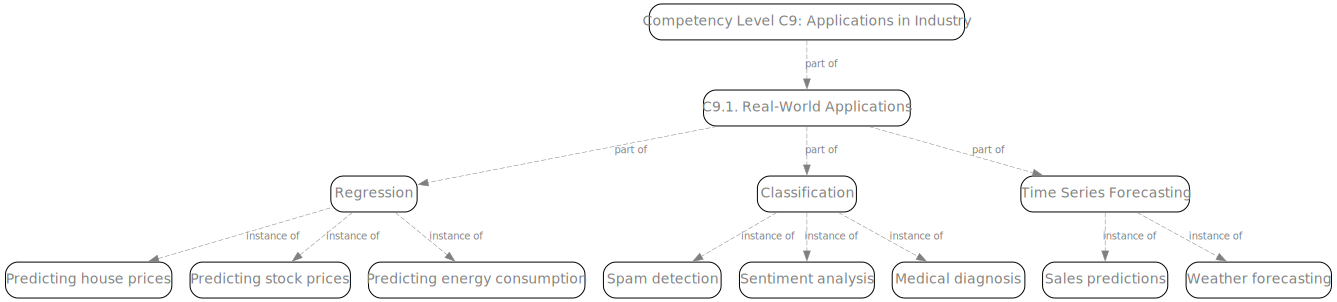

In [36]:
visualize_knowledge_graph(graph)

In [37]:
def merge_schemas(*schemas):
    combined_schema = {'nodes': [], 'edges': []}
    
    node_id_map = {} 

    next_id = 1  
    for schema in schemas:
        for node in schema['nodes']:
            new_node = node.copy()
            old_id = new_node['id']
            new_node['id'] = next_id
            node_id_map[old_id] = next_id
            combined_schema['nodes'].append(new_node)
            next_id += 1

        for edge in schema['edges']:
            new_edge = edge.copy()
            new_edge['source'] = node_id_map[edge['source']]
            new_edge['target'] = node_id_map[edge['target']]
            combined_schema['edges'].append(new_edge)
    
    return combined_schema

combined_schema = merge_schemas(schema_C1, schema_C2, schema_C3, schema_C4, schema_C5, schema_C6, schema_C7, schema_C8, schema_C9)

for node in combined_schema['nodes']:
    print(node['label'])

Competency Level C1: Foundational Knowledge
C1.1. Basic Statistics
C1.2. Linear Algebra
Mean, Median, Mode
Variance and Standard Deviation
Probability Theory
Probability Distributions
Covariance and Correlation
Vectors
Matrices
Eigenvalues and Eigenvectors
Singular Value Decomposition (SVD)
Vector Spaces and Orthogonality
Discrete vs. Continuous Probability Distributions
Conditional Probability
Bayes’ Theorem
Normal Distribution
Binomial Distribution
Poisson Distribution
Covariance
Correlation Coefficient (Pearson’s)
Matrix Operations
Determinants
Addition
Multiplication
Inverse
Transpose
Competency Level C2: Data Preparation
C2.1. Data Cleaning
C2.2. Data Transformation
C2.3. Feature Engineering
C2.4. Dimensionality Reduction
Handling Missing Data
Dealing with Outliers
Data Integrity Checks
Scaling Features
Encoding Categorical Variables
Feature Selection
Creating Interaction Terms
Polynomial Features
Principal Component Analysis (PCA)
Linear Discriminant Analysis (LDA)
Imputation met

In [ ]:
def add_prerequisite_connections(detailed_json, competency_json):
    competency_level_map = {
        node['label']: node['id']
        for node in detailed_json['nodes']
        if node['label'].startswith('Competency Level C')
    }
    
    print("Competency Level Map:", competency_level_map)
    
    for edge in competency_json['edges']:
        source_label = next(node['label'] for node in competency_json['nodes'] if node['id'] == edge['source'])
        target_label = next(node['label'] for node in competency_json['nodes'] if node['id'] == edge['target'])
        
        print(f"Processing edge from {source_label} to {target_label}")
        
        if source_label in competency_level_map and target_label in competency_level_map:
            detailed_source_id = competency_level_map[source_label]
            detailed_target_id = competency_level_map[target_label]
            
            detailed_json['edges'].append({
                'source': detailed_source_id,
                'target': detailed_target_id,
                'label': edge['label'],
                'color': edge['color']
            })
        else:
            print(f"Could not find source or target in map: {source_label} -> {target_label}")
    
    return detailed_json

updated_detailed_json = add_prerequisite_connections(combined_schema, schema_competencies)

final = json.loads(json.dumps(updated_detailed_json, indent=2))


Competency Level Map: {'Competency Level C1: Foundational Knowledge': 1, 'Competency Level C2: Data Preparation': 28, 'Competency Level C3: Core Algorithms': 54, 'Competency Level C4: Optimization and Model Training': 75, 'Competency Level C5: Model Evaluation and Validation': 86, 'Competency Level C6: Model Complexity and Generalization': 113, 'Competency Level C7: Advanced Topics': 122, 'Competency Level C8: Practical Implementation': 129, 'Competency Level C9: Applications in Industry': 143}
Processing edge from Competency Level C1: Foundational Knowledge to Competency Level C2: Data Preparation
Processing edge from Competency Level C1: Foundational Knowledge to Competency Level C3: Core Algorithms
Processing edge from Competency Level C2: Data Preparation to Competency Level C3: Core Algorithms
Processing edge from Competency Level C2: Data Preparation to Competency Level C4: Optimization and Model Training
Processing edge from Competency Level C2: Data Preparation to Competency Le

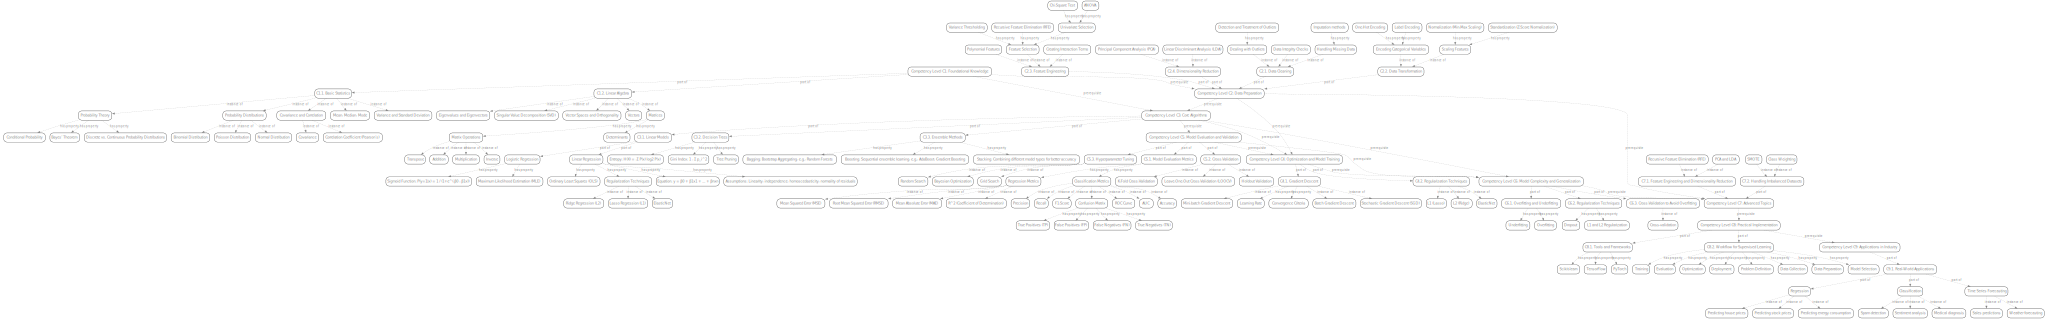

In [ ]:
def visualize_knowledge_graph(kg, node_shape='box', node_style='rounded', edge_style='dashed', fontname='Avenir Next', fontsize='14', fontcolor='grey', edge_width='0.5', edge_color='gray', edge_fontsize='10', output_filename='knowledge_graph'):
    dot = Digraph(comment="Knowledge Graph")

    for node in kg['nodes']:
        dot.node(str(node['id']), node['label'], shape=node_shape, style=node_style, color='black', fontname=fontname, fontsize=fontsize, fontcolor=fontcolor)
    for edge in kg['edges']:
        dot.edge(str(edge['source']), str(edge['target']), label=edge['label'], style=edge_style, color=edge_color, fontname=fontname, fontsize=edge_fontsize, fontcolor=fontcolor, penwidth=edge_width)
        
    dot.format = 'jpeg'
    dot.render(filename=output_filename, cleanup=True)
    
    display(Source(dot.source))
    
visualize_knowledge_graph(updated_detailed_json, output_filename='knowledge_graph')

In [42]:
combined_schema

{'nodes': [{'id': 1,
   'label': 'Competency Level C1: Foundational Knowledge',
   'color': 'lightblue'},
  {'id': 2, 'label': 'C1.1. Basic Statistics', 'color': 'lightgreen'},
  {'id': 3, 'label': 'C1.2. Linear Algebra', 'color': 'lightgreen'},
  {'id': 4, 'label': 'Mean, Median, Mode', 'color': 'lightyellow'},
  {'id': 5,
   'label': 'Variance and Standard Deviation',
   'color': 'lightyellow'},
  {'id': 6, 'label': 'Probability Theory', 'color': 'lightyellow'},
  {'id': 7, 'label': 'Probability Distributions', 'color': 'lightyellow'},
  {'id': 8, 'label': 'Covariance and Correlation', 'color': 'lightyellow'},
  {'id': 9, 'label': 'Vectors', 'color': 'lightyellow'},
  {'id': 10, 'label': 'Matrices', 'color': 'lightyellow'},
  {'id': 11, 'label': 'Eigenvalues and Eigenvectors', 'color': 'lightyellow'},
  {'id': 12,
   'label': 'Singular Value Decomposition (SVD)',
   'color': 'lightyellow'},
  {'id': 13,
   'label': 'Vector Spaces and Orthogonality',
   'color': 'lightyellow'},
  {'id

In [ ]:
def get_node_by_id(graph, node_id):
    for node in graph['nodes']:
        if node['id'] == node_id:
            return node
    return None

def get_nodes_by_label(graph, label):
    return [node for node in graph['nodes'] if node['label'] == label]

def get_edges_for_node(graph, node_id):
    return [edge for edge in graph['edges'] if edge['source'] == node_id or edge['target'] == node_id]

def get_target_nodes(graph, node_id):
    edges = get_edges_for_node(graph, node_id)
    target_nodes = []
    for edge in edges:
        if edge['source'] == node_id:
            target_node = get_node_by_id(graph, edge['target'])
            if target_node:
                target_nodes.append(target_node)
    return target_nodes

def find_path_between_nodes(graph, start_id, end_id):
    # Breadth-First Search to find the shortest path
    queue = deque([(start_id, [start_id])])  # (current node, path)
    visited = set()

    while queue:
        current_node, path = queue.popleft()

        if current_node == end_id:
            return path  # Return the path when destination is found

        if current_node not in visited:
            visited.add(current_node)

            # Get all connected nodes (targets) from current node
            target_nodes = get_target_nodes(graph, current_node)
            for target_node in target_nodes:
                queue.append((target_node['id'], path + [target_node['id']]))

    return None  # No path found

# Function to find a path between two nodes and return full node information
def find_path_between_nodes_full(graph, start_id, end_id):
    # Breadth-First Search to find the shortest path
    queue = deque([(start_id, [start_id])])  # (current node, path of IDs)
    visited = set()

    while queue:
        current_node, path = queue.popleft()

        if current_node == end_id:
            # Return full node information for the path
            return [get_node_by_id(graph, node_id) for node_id in path]

        if current_node not in visited:
            visited.add(current_node)

            # Get all connected nodes (targets) from current node
            target_nodes = get_target_nodes(graph, current_node)
            for target_node in target_nodes:
                queue.append((target_node['id'], path + [target_node['id']]))

    return None  # No path found



In [44]:
graph_data = combined_schema

In [45]:
node = get_node_by_id(graph_data, 1)
print(node)

{'id': 1, 'label': 'Competency Level C1: Foundational Knowledge', 'color': 'lightblue'}


In [46]:
nodes = get_nodes_by_label(graph_data, 'C1.1. Basic Statistics')
print(nodes)

[{'id': 2, 'label': 'C1.1. Basic Statistics', 'color': 'lightgreen'}]


In [51]:
edges = get_edges_for_node(graph_data, 1)
print(edges)

[{'source': 1, 'target': 2, 'label': 'part of', 'color': 'black'}, {'source': 1, 'target': 3, 'label': 'part of', 'color': 'black'}, {'source': 1, 'target': 28, 'label': 'prerequisite', 'color': 'black'}, {'source': 1, 'target': 54, 'label': 'prerequisite', 'color': 'black'}]


In [48]:
target_nodes = get_target_nodes(graph_data, 1)
print(target_nodes)

[{'id': 2, 'label': 'C1.1. Basic Statistics', 'color': 'lightgreen'}, {'id': 3, 'label': 'C1.2. Linear Algebra', 'color': 'lightgreen'}, {'id': 28, 'label': 'Competency Level C2: Data Preparation', 'color': 'lightblue'}, {'id': 54, 'label': 'Competency Level C3: Core Algorithms', 'color': 'lightblue'}]


In [60]:
path = find_path_between_nodes(graph_data, 1, 5)
print(path)

[1, 2, 5]


In [59]:
# Find and print the full path (with node details) between two nodes
full_path = find_path_between_nodes_full(graph_data, 1, 5)
for node in full_path:
    print(node)

{'id': 1, 'label': 'Competency Level C1: Foundational Knowledge', 'color': 'lightblue'}
{'id': 2, 'label': 'C1.1. Basic Statistics', 'color': 'lightgreen'}
{'id': 5, 'label': 'Variance and Standard Deviation', 'color': 'lightyellow'}
